<a href="https://colab.research.google.com/github/alexvuce/notebooks/blob/main/Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to ML

We will use the following workflow:

1) Define problem - what are we trying to solve? \
2) Obtain and pre-process data. \
3) Define and build model(s). \
4) Generate a solution to our problem by putting data into model. \
5) Evaluate the results - is this a good solution to the problem? 

In [ ]:
#@title 0) Start Notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data = pd.DataFrame({'MPG': {0: 18.0,
  1: 15.0,
  2: 18.0,
  3: 16.0,
  4: 17.0,
  5: 15.0,
  6: 14.0,
  7: 14.0,
  8: 14.0,
  9: 15.0,
  10: 15.0,
  11: 14.0,
  12: 15.0,
  13: 14.0,
  14: 24.0,
  15: 22.0,
  16: 18.0,
  17: 21.0,
  18: 27.0,
  19: 26.0,
  20: 25.0,
  21: 24.0,
  22: 25.0,
  23: 26.0,
  24: 21.0,
  25: 10.0,
  26: 10.0,
  27: 11.0,
  28: 9.0,
  29: 27.0,
  30: 28.0,
  31: 25.0,
  33: 19.0,
  34: 16.0,
  35: 17.0,
  36: 19.0,
  37: 18.0,
  38: 14.0,
  39: 14.0,
  40: 14.0,
  41: 14.0,
  42: 12.0,
  43: 13.0,
  44: 13.0,
  45: 18.0,
  46: 22.0,
  47: 19.0,
  48: 18.0,
  49: 23.0,
  50: 28.0,
  51: 30.0,
  52: 30.0,
  53: 31.0,
  54: 35.0,
  55: 27.0,
  56: 26.0,
  57: 24.0,
  58: 25.0,
  59: 23.0,
  60: 20.0,
  61: 21.0,
  62: 13.0,
  63: 14.0,
  64: 15.0,
  65: 14.0,
  66: 17.0,
  67: 11.0,
  68: 13.0,
  69: 12.0,
  70: 13.0,
  71: 19.0,
  72: 15.0,
  73: 13.0,
  74: 13.0,
  75: 14.0,
  76: 18.0,
  77: 22.0,
  78: 21.0,
  79: 26.0,
  80: 22.0,
  81: 28.0,
  82: 23.0,
  83: 28.0,
  84: 27.0,
  85: 13.0,
  86: 14.0,
  87: 13.0,
  88: 14.0,
  89: 15.0,
  90: 12.0,
  91: 13.0,
  92: 13.0,
  93: 14.0,
  94: 13.0,
  95: 12.0,
  96: 13.0,
  97: 18.0,
  98: 16.0,
  99: 18.0,
  100: 18.0,
  101: 23.0,
  102: 26.0,
  103: 11.0,
  104: 12.0,
  105: 13.0,
  106: 12.0,
  107: 18.0,
  108: 20.0,
  109: 21.0,
  110: 22.0,
  111: 18.0,
  112: 19.0,
  113: 21.0,
  114: 26.0,
  115: 15.0,
  116: 16.0,
  117: 29.0,
  118: 24.0,
  119: 20.0,
  120: 19.0,
  121: 15.0,
  122: 24.0,
  123: 20.0,
  124: 11.0,
  125: 20.0,
  127: 19.0,
  128: 15.0,
  129: 31.0,
  130: 26.0,
  131: 32.0,
  132: 25.0,
  133: 16.0,
  134: 16.0,
  135: 18.0,
  136: 16.0,
  137: 13.0,
  138: 14.0,
  139: 14.0,
  140: 14.0,
  141: 29.0,
  142: 26.0,
  143: 26.0,
  144: 31.0,
  145: 32.0,
  146: 28.0,
  147: 24.0,
  148: 26.0,
  149: 24.0,
  150: 26.0,
  151: 31.0,
  152: 19.0,
  153: 18.0,
  154: 15.0,
  155: 15.0,
  156: 16.0,
  157: 15.0,
  158: 16.0,
  159: 14.0,
  160: 17.0,
  161: 16.0,
  162: 15.0,
  163: 18.0,
  164: 21.0,
  165: 20.0,
  166: 13.0,
  167: 29.0,
  168: 23.0,
  169: 20.0,
  170: 23.0,
  171: 24.0,
  172: 25.0,
  173: 24.0,
  174: 18.0,
  175: 29.0,
  176: 19.0,
  177: 23.0,
  178: 23.0,
  179: 22.0,
  180: 25.0,
  181: 33.0,
  182: 28.0,
  183: 25.0,
  184: 25.0,
  185: 26.0,
  186: 27.0,
  187: 17.5,
  188: 16.0,
  189: 15.5,
  190: 14.5,
  191: 22.0,
  192: 22.0,
  193: 24.0,
  194: 22.5,
  195: 29.0,
  196: 24.5,
  197: 29.0,
  198: 33.0,
  199: 20.0,
  200: 18.0,
  201: 18.5,
  202: 17.5,
  203: 29.5,
  204: 32.0,
  205: 28.0,
  206: 26.5,
  207: 20.0,
  208: 13.0,
  209: 19.0,
  210: 19.0,
  211: 16.5,
  212: 16.5,
  213: 13.0,
  214: 13.0,
  215: 13.0,
  216: 31.5,
  217: 30.0,
  218: 36.0,
  219: 25.5,
  220: 33.5,
  221: 17.5,
  222: 17.0,
  223: 15.5,
  224: 15.0,
  225: 17.5,
  226: 20.5,
  227: 19.0,
  228: 18.5,
  229: 16.0,
  230: 15.5,
  231: 15.5,
  232: 16.0,
  233: 29.0,
  234: 24.5,
  235: 26.0,
  236: 25.5,
  237: 30.5,
  238: 33.5,
  239: 30.0,
  240: 30.5,
  241: 22.0,
  242: 21.5,
  243: 21.5,
  244: 43.1,
  245: 36.1,
  246: 32.8,
  247: 39.4,
  248: 36.1,
  249: 19.9,
  250: 19.4,
  251: 20.2,
  252: 19.2,
  253: 20.5,
  254: 20.2,
  255: 25.1,
  256: 20.5,
  257: 19.4,
  258: 20.6,
  259: 20.8,
  260: 18.6,
  261: 18.1,
  262: 19.2,
  263: 17.7,
  264: 18.1,
  265: 17.5,
  266: 30.0,
  267: 27.5,
  268: 27.2,
  269: 30.9,
  270: 21.1,
  271: 23.2,
  272: 23.8,
  273: 23.9,
  274: 20.3,
  275: 17.0,
  276: 21.6,
  277: 16.2,
  278: 31.5,
  279: 29.5,
  280: 21.5,
  281: 19.8,
  282: 22.3,
  283: 20.2,
  284: 20.6,
  285: 17.0,
  286: 17.6,
  287: 16.5,
  288: 18.2,
  289: 16.9,
  290: 15.5,
  291: 19.2,
  292: 18.5,
  293: 31.9,
  294: 34.1,
  295: 35.7,
  296: 27.4,
  297: 25.4,
  298: 23.0,
  299: 27.2,
  300: 23.9,
  301: 34.2,
  302: 34.5,
  303: 31.8,
  304: 37.3,
  305: 28.4,
  306: 28.8,
  307: 26.8,
  308: 33.5,
  309: 41.5,
  310: 38.1,
  311: 32.1,
  312: 37.2,
  313: 28.0,
  314: 26.4,
  315: 24.3,
  316: 19.1,
  317: 34.3,
  318: 29.8,
  319: 31.3,
  320: 37.0,
  321: 32.2,
  322: 46.6,
  323: 27.9,
  324: 40.8,
  325: 44.3,
  326: 43.4,
  327: 36.4,
  328: 30.0,
  329: 44.6,
  331: 33.8,
  332: 29.8,
  333: 32.7,
  334: 23.7,
  335: 35.0,
  337: 32.4,
  338: 27.2,
  339: 26.6,
  340: 25.8,
  341: 23.5,
  342: 30.0,
  343: 39.1,
  344: 39.0,
  345: 35.1,
  346: 32.3,
  347: 37.0,
  348: 37.7,
  349: 34.1,
  350: 34.7,
  351: 34.4,
  352: 29.9,
  353: 33.0,
  355: 33.7,
  356: 32.4,
  357: 32.9,
  358: 31.6,
  359: 28.1,
  360: 30.7,
  361: 25.4,
  362: 24.2,
  363: 22.4,
  364: 26.6,
  365: 20.2,
  366: 17.6,
  367: 28.0,
  368: 27.0,
  369: 34.0,
  370: 31.0,
  371: 29.0,
  372: 27.0,
  373: 24.0,
  375: 36.0,
  376: 37.0,
  377: 31.0,
  378: 38.0,
  379: 36.0,
  380: 36.0,
  381: 36.0,
  382: 34.0,
  383: 38.0,
  384: 32.0,
  385: 38.0,
  386: 25.0,
  387: 38.0,
  388: 26.0,
  389: 22.0,
  390: 32.0,
  391: 36.0,
  392: 27.0,
  393: 27.0,
  394: 44.0,
  395: 32.0,
  396: 28.0,
  397: 31.0},
 'Cylinders': {0: 8,
  1: 8,
  2: 8,
  3: 8,
  4: 8,
  5: 8,
  6: 8,
  7: 8,
  8: 8,
  9: 8,
  10: 8,
  11: 8,
  12: 8,
  13: 8,
  14: 4,
  15: 6,
  16: 6,
  17: 6,
  18: 4,
  19: 4,
  20: 4,
  21: 4,
  22: 4,
  23: 4,
  24: 6,
  25: 8,
  26: 8,
  27: 8,
  28: 8,
  29: 4,
  30: 4,
  31: 4,
  33: 6,
  34: 6,
  35: 6,
  36: 6,
  37: 6,
  38: 8,
  39: 8,
  40: 8,
  41: 8,
  42: 8,
  43: 8,
  44: 8,
  45: 6,
  46: 4,
  47: 6,
  48: 6,
  49: 4,
  50: 4,
  51: 4,
  52: 4,
  53: 4,
  54: 4,
  55: 4,
  56: 4,
  57: 4,
  58: 4,
  59: 4,
  60: 4,
  61: 4,
  62: 8,
  63: 8,
  64: 8,
  65: 8,
  66: 8,
  67: 8,
  68: 8,
  69: 8,
  70: 8,
  71: 3,
  72: 8,
  73: 8,
  74: 8,
  75: 8,
  76: 4,
  77: 4,
  78: 4,
  79: 4,
  80: 4,
  81: 4,
  82: 4,
  83: 4,
  84: 4,
  85: 8,
  86: 8,
  87: 8,
  88: 8,
  89: 8,
  90: 8,
  91: 8,
  92: 8,
  93: 8,
  94: 8,
  95: 8,
  96: 8,
  97: 6,
  98: 6,
  99: 6,
  100: 6,
  101: 6,
  102: 4,
  103: 8,
  104: 8,
  105: 8,
  106: 8,
  107: 6,
  108: 4,
  109: 4,
  110: 4,
  111: 3,
  112: 4,
  113: 6,
  114: 4,
  115: 8,
  116: 8,
  117: 4,
  118: 4,
  119: 4,
  120: 4,
  121: 8,
  122: 4,
  123: 6,
  124: 8,
  125: 6,
  127: 6,
  128: 6,
  129: 4,
  130: 4,
  131: 4,
  132: 4,
  133: 6,
  134: 6,
  135: 6,
  136: 8,
  137: 8,
  138: 8,
  139: 8,
  140: 8,
  141: 4,
  142: 4,
  143: 4,
  144: 4,
  145: 4,
  146: 4,
  147: 4,
  148: 4,
  149: 4,
  150: 4,
  151: 4,
  152: 6,
  153: 6,
  154: 6,
  155: 6,
  156: 8,
  157: 8,
  158: 8,
  159: 8,
  160: 6,
  161: 6,
  162: 6,
  163: 6,
  164: 6,
  165: 8,
  166: 8,
  167: 4,
  168: 4,
  169: 6,
  170: 4,
  171: 4,
  172: 4,
  173: 4,
  174: 6,
  175: 4,
  176: 6,
  177: 4,
  178: 4,
  179: 4,
  180: 4,
  181: 4,
  182: 4,
  183: 4,
  184: 4,
  185: 4,
  186: 4,
  187: 8,
  188: 8,
  189: 8,
  190: 8,
  191: 6,
  192: 6,
  193: 6,
  194: 6,
  195: 4,
  196: 4,
  197: 4,
  198: 4,
  199: 6,
  200: 6,
  201: 6,
  202: 6,
  203: 4,
  204: 4,
  205: 4,
  206: 4,
  207: 4,
  208: 8,
  209: 4,
  210: 6,
  211: 6,
  212: 8,
  213: 8,
  214: 8,
  215: 8,
  216: 4,
  217: 4,
  218: 4,
  219: 4,
  220: 4,
  221: 8,
  222: 8,
  223: 8,
  224: 8,
  225: 6,
  226: 6,
  227: 6,
  228: 6,
  229: 8,
  230: 8,
  231: 8,
  232: 8,
  233: 4,
  234: 4,
  235: 4,
  236: 4,
  237: 4,
  238: 4,
  239: 4,
  240: 4,
  241: 6,
  242: 4,
  243: 3,
  244: 4,
  245: 4,
  246: 4,
  247: 4,
  248: 4,
  249: 8,
  250: 8,
  251: 8,
  252: 6,
  253: 6,
  254: 6,
  255: 4,
  256: 6,
  257: 6,
  258: 6,
  259: 6,
  260: 6,
  261: 6,
  262: 8,
  263: 6,
  264: 8,
  265: 8,
  266: 4,
  267: 4,
  268: 4,
  269: 4,
  270: 4,
  271: 4,
  272: 4,
  273: 4,
  274: 5,
  275: 6,
  276: 4,
  277: 6,
  278: 4,
  279: 4,
  280: 6,
  281: 6,
  282: 4,
  283: 6,
  284: 6,
  285: 8,
  286: 8,
  287: 8,
  288: 8,
  289: 8,
  290: 8,
  291: 8,
  292: 8,
  293: 4,
  294: 4,
  295: 4,
  296: 4,
  297: 5,
  298: 8,
  299: 4,
  300: 8,
  301: 4,
  302: 4,
  303: 4,
  304: 4,
  305: 4,
  306: 6,
  307: 6,
  308: 4,
  309: 4,
  310: 4,
  311: 4,
  312: 4,
  313: 4,
  314: 4,
  315: 4,
  316: 6,
  317: 4,
  318: 4,
  319: 4,
  320: 4,
  321: 4,
  322: 4,
  323: 4,
  324: 4,
  325: 4,
  326: 4,
  327: 5,
  328: 4,
  329: 4,
  331: 4,
  332: 4,
  333: 6,
  334: 3,
  335: 4,
  337: 4,
  338: 4,
  339: 4,
  340: 4,
  341: 6,
  342: 4,
  343: 4,
  344: 4,
  345: 4,
  346: 4,
  347: 4,
  348: 4,
  349: 4,
  350: 4,
  351: 4,
  352: 4,
  353: 4,
  355: 4,
  356: 4,
  357: 4,
  358: 4,
  359: 4,
  360: 6,
  361: 6,
  362: 6,
  363: 6,
  364: 8,
  365: 6,
  366: 6,
  367: 4,
  368: 4,
  369: 4,
  370: 4,
  371: 4,
  372: 4,
  373: 4,
  375: 4,
  376: 4,
  377: 4,
  378: 4,
  379: 4,
  380: 4,
  381: 4,
  382: 4,
  383: 4,
  384: 4,
  385: 4,
  386: 6,
  387: 6,
  388: 4,
  389: 6,
  390: 4,
  391: 4,
  392: 4,
  393: 4,
  394: 4,
  395: 4,
  396: 4,
  397: 4},
 'Displacement': {0: 307.0,
  1: 350.0,
  2: 318.0,
  3: 304.0,
  4: 302.0,
  5: 429.0,
  6: 454.0,
  7: 440.0,
  8: 455.0,
  9: 390.0,
  10: 383.0,
  11: 340.0,
  12: 400.0,
  13: 455.0,
  14: 113.0,
  15: 198.0,
  16: 199.0,
  17: 200.0,
  18: 97.0,
  19: 97.0,
  20: 110.0,
  21: 107.0,
  22: 104.0,
  23: 121.0,
  24: 199.0,
  25: 360.0,
  26: 307.0,
  27: 318.0,
  28: 304.0,
  29: 97.0,
  30: 140.0,
  31: 113.0,
  33: 232.0,
  34: 225.0,
  35: 250.0,
  36: 250.0,
  37: 232.0,
  38: 350.0,
  39: 400.0,
  40: 351.0,
  41: 318.0,
  42: 383.0,
  43: 400.0,
  44: 400.0,
  45: 258.0,
  46: 140.0,
  47: 250.0,
  48: 250.0,
  49: 122.0,
  50: 116.0,
  51: 79.0,
  52: 88.0,
  53: 71.0,
  54: 72.0,
  55: 97.0,
  56: 91.0,
  57: 113.0,
  58: 97.5,
  59: 97.0,
  60: 140.0,
  61: 122.0,
  62: 350.0,
  63: 400.0,
  64: 318.0,
  65: 351.0,
  66: 304.0,
  67: 429.0,
  68: 350.0,
  69: 350.0,
  70: 400.0,
  71: 70.0,
  72: 304.0,
  73: 307.0,
  74: 302.0,
  75: 318.0,
  76: 121.0,
  77: 121.0,
  78: 120.0,
  79: 96.0,
  80: 122.0,
  81: 97.0,
  82: 120.0,
  83: 98.0,
  84: 97.0,
  85: 350.0,
  86: 304.0,
  87: 350.0,
  88: 302.0,
  89: 318.0,
  90: 429.0,
  91: 400.0,
  92: 351.0,
  93: 318.0,
  94: 440.0,
  95: 455.0,
  96: 360.0,
  97: 225.0,
  98: 250.0,
  99: 232.0,
  100: 250.0,
  101: 198.0,
  102: 97.0,
  103: 400.0,
  104: 400.0,
  105: 360.0,
  106: 350.0,
  107: 232.0,
  108: 97.0,
  109: 140.0,
  110: 108.0,
  111: 70.0,
  112: 122.0,
  113: 155.0,
  114: 98.0,
  115: 350.0,
  116: 400.0,
  117: 68.0,
  118: 116.0,
  119: 114.0,
  120: 121.0,
  121: 318.0,
  122: 121.0,
  123: 156.0,
  124: 350.0,
  125: 198.0,
  127: 232.0,
  128: 250.0,
  129: 79.0,
  130: 122.0,
  131: 71.0,
  132: 140.0,
  133: 250.0,
  134: 258.0,
  135: 225.0,
  136: 302.0,
  137: 350.0,
  138: 318.0,
  139: 302.0,
  140: 304.0,
  141: 98.0,
  142: 79.0,
  143: 97.0,
  144: 76.0,
  145: 83.0,
  146: 90.0,
  147: 90.0,
  148: 116.0,
  149: 120.0,
  150: 108.0,
  151: 79.0,
  152: 225.0,
  153: 250.0,
  154: 250.0,
  155: 250.0,
  156: 400.0,
  157: 350.0,
  158: 318.0,
  159: 351.0,
  160: 231.0,
  161: 250.0,
  162: 258.0,
  163: 225.0,
  164: 231.0,
  165: 262.0,
  166: 302.0,
  167: 97.0,
  168: 140.0,
  169: 232.0,
  170: 140.0,
  171: 134.0,
  172: 90.0,
  173: 119.0,
  174: 171.0,
  175: 90.0,
  176: 232.0,
  177: 115.0,
  178: 120.0,
  179: 121.0,
  180: 121.0,
  181: 91.0,
  182: 107.0,
  183: 116.0,
  184: 140.0,
  185: 98.0,
  186: 101.0,
  187: 305.0,
  188: 318.0,
  189: 304.0,
  190: 351.0,
  191: 225.0,
  192: 250.0,
  193: 200.0,
  194: 232.0,
  195: 85.0,
  196: 98.0,
  197: 90.0,
  198: 91.0,
  199: 225.0,
  200: 250.0,
  201: 250.0,
  202: 258.0,
  203: 97.0,
  204: 85.0,
  205: 97.0,
  206: 140.0,
  207: 130.0,
  208: 318.0,
  209: 120.0,
  210: 156.0,
  211: 168.0,
  212: 350.0,
  213: 350.0,
  214: 302.0,
  215: 318.0,
  216: 98.0,
  217: 111.0,
  218: 79.0,
  219: 122.0,
  220: 85.0,
  221: 305.0,
  222: 260.0,
  223: 318.0,
  224: 302.0,
  225: 250.0,
  226: 231.0,
  227: 225.0,
  228: 250.0,
  229: 400.0,
  230: 350.0,
  231: 400.0,
  232: 351.0,
  233: 97.0,
  234: 151.0,
  235: 97.0,
  236: 140.0,
  237: 98.0,
  238: 98.0,
  239: 97.0,
  240: 97.0,
  241: 146.0,
  242: 121.0,
  243: 80.0,
  244: 90.0,
  245: 98.0,
  246: 78.0,
  247: 85.0,
  248: 91.0,
  249: 260.0,
  250: 318.0,
  251: 302.0,
  252: 231.0,
  253: 200.0,
  254: 200.0,
  255: 140.0,
  256: 225.0,
  257: 232.0,
  258: 231.0,
  259: 200.0,
  260: 225.0,
  261: 258.0,
  262: 305.0,
  263: 231.0,
  264: 302.0,
  265: 318.0,
  266: 98.0,
  267: 134.0,
  268: 119.0,
  269: 105.0,
  270: 134.0,
  271: 156.0,
  272: 151.0,
  273: 119.0,
  274: 131.0,
  275: 163.0,
  276: 121.0,
  277: 163.0,
  278: 89.0,
  279: 98.0,
  280: 231.0,
  281: 200.0,
  282: 140.0,
  283: 232.0,
  284: 225.0,
  285: 305.0,
  286: 302.0,
  287: 351.0,
  288: 318.0,
  289: 350.0,
  290: 351.0,
  291: 267.0,
  292: 360.0,
  293: 89.0,
  294: 86.0,
  295: 98.0,
  296: 121.0,
  297: 183.0,
  298: 350.0,
  299: 141.0,
  300: 260.0,
  301: 105.0,
  302: 105.0,
  303: 85.0,
  304: 91.0,
  305: 151.0,
  306: 173.0,
  307: 173.0,
  308: 151.0,
  309: 98.0,
  310: 89.0,
  311: 98.0,
  312: 86.0,
  313: 151.0,
  314: 140.0,
  315: 151.0,
  316: 225.0,
  317: 97.0,
  318: 134.0,
  319: 120.0,
  320: 119.0,
  321: 108.0,
  322: 86.0,
  323: 156.0,
  324: 85.0,
  325: 90.0,
  326: 90.0,
  327: 121.0,
  328: 146.0,
  329: 91.0,
  331: 97.0,
  332: 89.0,
  333: 168.0,
  334: 70.0,
  335: 122.0,
  337: 107.0,
  338: 135.0,
  339: 151.0,
  340: 156.0,
  341: 173.0,
  342: 135.0,
  343: 79.0,
  344: 86.0,
  345: 81.0,
  346: 97.0,
  347: 85.0,
  348: 89.0,
  349: 91.0,
  350: 105.0,
  351: 98.0,
  352: 98.0,
  353: 105.0,
  355: 107.0,
  356: 108.0,
  357: 119.0,
  358: 120.0,
  359: 141.0,
  360: 145.0,
  361: 168.0,
  362: 146.0,
  363: 231.0,
  364: 350.0,
  365: 200.0,
  366: 225.0,
  367: 112.0,
  368: 112.0,
  369: 112.0,
  370: 112.0,
  371: 135.0,
  372: 151.0,
  373: 140.0,
  375: 105.0,
  376: 91.0,
  377: 91.0,
  378: 105.0,
  379: 98.0,
  380: 120.0,
  381: 107.0,
  382: 108.0,
  383: 91.0,
  384: 91.0,
  385: 91.0,
  386: 181.0,
  387: 262.0,
  388: 156.0,
  389: 232.0,
  390: 144.0,
  391: 135.0,
  392: 151.0,
  393: 140.0,
  394: 97.0,
  395: 135.0,
  396: 120.0,
  397: 119.0},
 'Horsepower': {0: 130.0,
  1: 165.0,
  2: 150.0,
  3: 150.0,
  4: 140.0,
  5: 198.0,
  6: 220.0,
  7: 215.0,
  8: 225.0,
  9: 190.0,
  10: 170.0,
  11: 160.0,
  12: 150.0,
  13: 225.0,
  14: 95.0,
  15: 95.0,
  16: 97.0,
  17: 85.0,
  18: 88.0,
  19: 46.0,
  20: 87.0,
  21: 90.0,
  22: 95.0,
  23: 113.0,
  24: 90.0,
  25: 215.0,
  26: 200.0,
  27: 210.0,
  28: 193.0,
  29: 88.0,
  30: 90.0,
  31: 95.0,
  33: 100.0,
  34: 105.0,
  35: 100.0,
  36: 88.0,
  37: 100.0,
  38: 165.0,
  39: 175.0,
  40: 153.0,
  41: 150.0,
  42: 180.0,
  43: 170.0,
  44: 175.0,
  45: 110.0,
  46: 72.0,
  47: 100.0,
  48: 88.0,
  49: 86.0,
  50: 90.0,
  51: 70.0,
  52: 76.0,
  53: 65.0,
  54: 69.0,
  55: 60.0,
  56: 70.0,
  57: 95.0,
  58: 80.0,
  59: 54.0,
  60: 90.0,
  61: 86.0,
  62: 165.0,
  63: 175.0,
  64: 150.0,
  65: 153.0,
  66: 150.0,
  67: 208.0,
  68: 155.0,
  69: 160.0,
  70: 190.0,
  71: 97.0,
  72: 150.0,
  73: 130.0,
  74: 140.0,
  75: 150.0,
  76: 112.0,
  77: 76.0,
  78: 87.0,
  79: 69.0,
  80: 86.0,
  81: 92.0,
  82: 97.0,
  83: 80.0,
  84: 88.0,
  85: 175.0,
  86: 150.0,
  87: 145.0,
  88: 137.0,
  89: 150.0,
  90: 198.0,
  91: 150.0,
  92: 158.0,
  93: 150.0,
  94: 215.0,
  95: 225.0,
  96: 175.0,
  97: 105.0,
  98: 100.0,
  99: 100.0,
  100: 88.0,
  101: 95.0,
  102: 46.0,
  103: 150.0,
  104: 167.0,
  105: 170.0,
  106: 180.0,
  107: 100.0,
  108: 88.0,
  109: 72.0,
  110: 94.0,
  111: 90.0,
  112: 85.0,
  113: 107.0,
  114: 90.0,
  115: 145.0,
  116: 230.0,
  117: 49.0,
  118: 75.0,
  119: 91.0,
  120: 112.0,
  121: 150.0,
  122: 110.0,
  123: 122.0,
  124: 180.0,
  125: 95.0,
  127: 100.0,
  128: 100.0,
  129: 67.0,
  130: 80.0,
  131: 65.0,
  132: 75.0,
  133: 100.0,
  134: 110.0,
  135: 105.0,
  136: 140.0,
  137: 150.0,
  138: 150.0,
  139: 140.0,
  140: 150.0,
  141: 83.0,
  142: 67.0,
  143: 78.0,
  144: 52.0,
  145: 61.0,
  146: 75.0,
  147: 75.0,
  148: 75.0,
  149: 97.0,
  150: 93.0,
  151: 67.0,
  152: 95.0,
  153: 105.0,
  154: 72.0,
  155: 72.0,
  156: 170.0,
  157: 145.0,
  158: 150.0,
  159: 148.0,
  160: 110.0,
  161: 105.0,
  162: 110.0,
  163: 95.0,
  164: 110.0,
  165: 110.0,
  166: 129.0,
  167: 75.0,
  168: 83.0,
  169: 100.0,
  170: 78.0,
  171: 96.0,
  172: 71.0,
  173: 97.0,
  174: 97.0,
  175: 70.0,
  176: 90.0,
  177: 95.0,
  178: 88.0,
  179: 98.0,
  180: 115.0,
  181: 53.0,
  182: 86.0,
  183: 81.0,
  184: 92.0,
  185: 79.0,
  186: 83.0,
  187: 140.0,
  188: 150.0,
  189: 120.0,
  190: 152.0,
  191: 100.0,
  192: 105.0,
  193: 81.0,
  194: 90.0,
  195: 52.0,
  196: 60.0,
  197: 70.0,
  198: 53.0,
  199: 100.0,
  200: 78.0,
  201: 110.0,
  202: 95.0,
  203: 71.0,
  204: 70.0,
  205: 75.0,
  206: 72.0,
  207: 102.0,
  208: 150.0,
  209: 88.0,
  210: 108.0,
  211: 120.0,
  212: 180.0,
  213: 145.0,
  214: 130.0,
  215: 150.0,
  216: 68.0,
  217: 80.0,
  218: 58.0,
  219: 96.0,
  220: 70.0,
  221: 145.0,
  222: 110.0,
  223: 145.0,
  224: 130.0,
  225: 110.0,
  226: 105.0,
  227: 100.0,
  228: 98.0,
  229: 180.0,
  230: 170.0,
  231: 190.0,
  232: 149.0,
  233: 78.0,
  234: 88.0,
  235: 75.0,
  236: 89.0,
  237: 63.0,
  238: 83.0,
  239: 67.0,
  240: 78.0,
  241: 97.0,
  242: 110.0,
  243: 110.0,
  244: 48.0,
  245: 66.0,
  246: 52.0,
  247: 70.0,
  248: 60.0,
  249: 110.0,
  250: 140.0,
  251: 139.0,
  252: 105.0,
  253: 95.0,
  254: 85.0,
  255: 88.0,
  256: 100.0,
  257: 90.0,
  258: 105.0,
  259: 85.0,
  260: 110.0,
  261: 120.0,
  262: 145.0,
  263: 165.0,
  264: 139.0,
  265: 140.0,
  266: 68.0,
  267: 95.0,
  268: 97.0,
  269: 75.0,
  270: 95.0,
  271: 105.0,
  272: 85.0,
  273: 97.0,
  274: 103.0,
  275: 125.0,
  276: 115.0,
  277: 133.0,
  278: 71.0,
  279: 68.0,
  280: 115.0,
  281: 85.0,
  282: 88.0,
  283: 90.0,
  284: 110.0,
  285: 130.0,
  286: 129.0,
  287: 138.0,
  288: 135.0,
  289: 155.0,
  290: 142.0,
  291: 125.0,
  292: 150.0,
  293: 71.0,
  294: 65.0,
  295: 80.0,
  296: 80.0,
  297: 77.0,
  298: 125.0,
  299: 71.0,
  300: 90.0,
  301: 70.0,
  302: 70.0,
  303: 65.0,
  304: 69.0,
  305: 90.0,
  306: 115.0,
  307: 115.0,
  308: 90.0,
  309: 76.0,
  310: 60.0,
  311: 70.0,
  312: 65.0,
  313: 90.0,
  314: 88.0,
  315: 90.0,
  316: 90.0,
  317: 78.0,
  318: 90.0,
  319: 75.0,
  320: 92.0,
  321: 75.0,
  322: 65.0,
  323: 105.0,
  324: 65.0,
  325: 48.0,
  326: 48.0,
  327: 67.0,
  328: 67.0,
  329: 67.0,
  331: 67.0,
  332: 62.0,
  333: 132.0,
  334: 100.0,
  335: 88.0,
  337: 72.0,
  338: 84.0,
  339: 84.0,
  340: 92.0,
  341: 110.0,
  342: 84.0,
  343: 58.0,
  344: 64.0,
  345: 60.0,
  346: 67.0,
  347: 65.0,
  348: 62.0,
  349: 68.0,
  350: 63.0,
  351: 65.0,
  352: 65.0,
  353: 74.0,
  355: 75.0,
  356: 75.0,
  357: 100.0,
  358: 74.0,
  359: 80.0,
  360: 76.0,
  361: 116.0,
  362: 120.0,
  363: 110.0,
  364: 105.0,
  365: 88.0,
  366: 85.0,
  367: 88.0,
  368: 88.0,
  369: 88.0,
  370: 85.0,
  371: 84.0,
  372: 90.0,
  373: 92.0,
  375: 74.0,
  376: 68.0,
  377: 68.0,
  378: 63.0,
  379: 70.0,
  380: 88.0,
  381: 75.0,
  382: 70.0,
  383: 67.0,
  384: 67.0,
  385: 67.0,
  386: 110.0,
  387: 85.0,
  388: 92.0,
  389: 112.0,
  390: 96.0,
  391: 84.0,
  392: 90.0,
  393: 86.0,
  394: 52.0,
  395: 84.0,
  396: 79.0,
  397: 82.0},
 'Weight': {0: 3504.0,
  1: 3693.0,
  2: 3436.0,
  3: 3433.0,
  4: 3449.0,
  5: 4341.0,
  6: 4354.0,
  7: 4312.0,
  8: 4425.0,
  9: 3850.0,
  10: 3563.0,
  11: 3609.0,
  12: 3761.0,
  13: 3086.0,
  14: 2372.0,
  15: 2833.0,
  16: 2774.0,
  17: 2587.0,
  18: 2130.0,
  19: 1835.0,
  20: 2672.0,
  21: 2430.0,
  22: 2375.0,
  23: 2234.0,
  24: 2648.0,
  25: 4615.0,
  26: 4376.0,
  27: 4382.0,
  28: 4732.0,
  29: 2130.0,
  30: 2264.0,
  31: 2228.0,
  33: 2634.0,
  34: 3439.0,
  35: 3329.0,
  36: 3302.0,
  37: 3288.0,
  38: 4209.0,
  39: 4464.0,
  40: 4154.0,
  41: 4096.0,
  42: 4955.0,
  43: 4746.0,
  44: 5140.0,
  45: 2962.0,
  46: 2408.0,
  47: 3282.0,
  48: 3139.0,
  49: 2220.0,
  50: 2123.0,
  51: 2074.0,
  52: 2065.0,
  53: 1773.0,
  54: 1613.0,
  55: 1834.0,
  56: 1955.0,
  57: 2278.0,
  58: 2126.0,
  59: 2254.0,
  60: 2408.0,
  61: 2226.0,
  62: 4274.0,
  63: 4385.0,
  64: 4135.0,
  65: 4129.0,
  66: 3672.0,
  67: 4633.0,
  68: 4502.0,
  69: 4456.0,
  70: 4422.0,
  71: 2330.0,
  72: 3892.0,
  73: 4098.0,
  74: 4294.0,
  75: 4077.0,
  76: 2933.0,
  77: 2511.0,
  78: 2979.0,
  79: 2189.0,
  80: 2395.0,
  81: 2288.0,
  82: 2506.0,
  83: 2164.0,
  84: 2100.0,
  85: 4100.0,
  86: 3672.0,
  87: 3988.0,
  88: 4042.0,
  89: 3777.0,
  90: 4952.0,
  91: 4464.0,
  92: 4363.0,
  93: 4237.0,
  94: 4735.0,
  95: 4951.0,
  96: 3821.0,
  97: 3121.0,
  98: 3278.0,
  99: 2945.0,
  100: 3021.0,
  101: 2904.0,
  102: 1950.0,
  103: 4997.0,
  104: 4906.0,
  105: 4654.0,
  106: 4499.0,
  107: 2789.0,
  108: 2279.0,
  109: 2401.0,
  110: 2379.0,
  111: 2124.0,
  112: 2310.0,
  113: 2472.0,
  114: 2265.0,
  115: 4082.0,
  116: 4278.0,
  117: 1867.0,
  118: 2158.0,
  119: 2582.0,
  120: 2868.0,
  121: 3399.0,
  122: 2660.0,
  123: 2807.0,
  124: 3664.0,
  125: 3102.0,
  127: 2901.0,
  128: 3336.0,
  129: 1950.0,
  130: 2451.0,
  131: 1836.0,
  132: 2542.0,
  133: 3781.0,
  134: 3632.0,
  135: 3613.0,
  136: 4141.0,
  137: 4699.0,
  138: 4457.0,
  139: 4638.0,
  140: 4257.0,
  141: 2219.0,
  142: 1963.0,
  143: 2300.0,
  144: 1649.0,
  145: 2003.0,
  146: 2125.0,
  147: 2108.0,
  148: 2246.0,
  149: 2489.0,
  150: 2391.0,
  151: 2000.0,
  152: 3264.0,
  153: 3459.0,
  154: 3432.0,
  155: 3158.0,
  156: 4668.0,
  157: 4440.0,
  158: 4498.0,
  159: 4657.0,
  160: 3907.0,
  161: 3897.0,
  162: 3730.0,
  163: 3785.0,
  164: 3039.0,
  165: 3221.0,
  166: 3169.0,
  167: 2171.0,
  168: 2639.0,
  169: 2914.0,
  170: 2592.0,
  171: 2702.0,
  172: 2223.0,
  173: 2545.0,
  174: 2984.0,
  175: 1937.0,
  176: 3211.0,
  177: 2694.0,
  178: 2957.0,
  179: 2945.0,
  180: 2671.0,
  181: 1795.0,
  182: 2464.0,
  183: 2220.0,
  184: 2572.0,
  185: 2255.0,
  186: 2202.0,
  187: 4215.0,
  188: 4190.0,
  189: 3962.0,
  190: 4215.0,
  191: 3233.0,
  192: 3353.0,
  193: 3012.0,
  194: 3085.0,
  195: 2035.0,
  196: 2164.0,
  197: 1937.0,
  198: 1795.0,
  199: 3651.0,
  200: 3574.0,
  201: 3645.0,
  202: 3193.0,
  203: 1825.0,
  204: 1990.0,
  205: 2155.0,
  206: 2565.0,
  207: 3150.0,
  208: 3940.0,
  209: 3270.0,
  210: 2930.0,
  211: 3820.0,
  212: 4380.0,
  213: 4055.0,
  214: 3870.0,
  215: 3755.0,
  216: 2045.0,
  217: 2155.0,
  218: 1825.0,
  219: 2300.0,
  220: 1945.0,
  221: 3880.0,
  222: 4060.0,
  223: 4140.0,
  224: 4295.0,
  225: 3520.0,
  226: 3425.0,
  227: 3630.0,
  228: 3525.0,
  229: 4220.0,
  230: 4165.0,
  231: 4325.0,
  232: 4335.0,
  233: 1940.0,
  234: 2740.0,
  235: 2265.0,
  236: 2755.0,
  237: 2051.0,
  238: 2075.0,
  239: 1985.0,
  240: 2190.0,
  241: 2815.0,
  242: 2600.0,
  243: 2720.0,
  244: 1985.0,
  245: 1800.0,
  246: 1985.0,
  247: 2070.0,
  248: 1800.0,
  249: 3365.0,
  250: 3735.0,
  251: 3570.0,
  252: 3535.0,
  253: 3155.0,
  254: 2965.0,
  255: 2720.0,
  256: 3430.0,
  257: 3210.0,
  258: 3380.0,
  259: 3070.0,
  260: 3620.0,
  261: 3410.0,
  262: 3425.0,
  263: 3445.0,
  264: 3205.0,
  265: 4080.0,
  266: 2155.0,
  267: 2560.0,
  268: 2300.0,
  269: 2230.0,
  270: 2515.0,
  271: 2745.0,
  272: 2855.0,
  273: 2405.0,
  274: 2830.0,
  275: 3140.0,
  276: 2795.0,
  277: 3410.0,
  278: 1990.0,
  279: 2135.0,
  280: 3245.0,
  281: 2990.0,
  282: 2890.0,
  283: 3265.0,
  284: 3360.0,
  285: 3840.0,
  286: 3725.0,
  287: 3955.0,
  288: 3830.0,
  289: 4360.0,
  290: 4054.0,
  291: 3605.0,
  292: 3940.0,
  293: 1925.0,
  294: 1975.0,
  295: 1915.0,
  296: 2670.0,
  297: 3530.0,
  298: 3900.0,
  299: 3190.0,
  300: 3420.0,
  301: 2200.0,
  302: 2150.0,
  303: 2020.0,
  304: 2130.0,
  305: 2670.0,
  306: 2595.0,
  307: 2700.0,
  308: 2556.0,
  309: 2144.0,
  310: 1968.0,
  311: 2120.0,
  312: 2019.0,
  313: 2678.0,
  314: 2870.0,
  315: 3003.0,
  316: 3381.0,
  317: 2188.0,
  318: 2711.0,
  319: 2542.0,
  320: 2434.0,
  321: 2265.0,
  322: 2110.0,
  323: 2800.0,
  324: 2110.0,
  325: 2085.0,
  326: 2335.0,
  327: 2950.0,
  328: 3250.0,
  329: 1850.0,
  331: 2145.0,
  332: 1845.0,
  333: 2910.0,
  334: 2420.0,
  335: 2500.0,
  337: 2290.0,
  338: 2490.0,
  339: 2635.0,
  340: 2620.0,
  341: 2725.0,
  342: 2385.0,
  343: 1755.0,
  344: 1875.0,
  345: 1760.0,
  346: 2065.0,
  347: 1975.0,
  348: 2050.0,
  349: 1985.0,
  350: 2215.0,
  351: 2045.0,
  352: 2380.0,
  353: 2190.0,
  355: 2210.0,
  356: 2350.0,
  357: 2615.0,
  358: 2635.0,
  359: 3230.0,
  360: 3160.0,
  361: 2900.0,
  362: 2930.0,
  363: 3415.0,
  364: 3725.0,
  365: 3060.0,
  366: 3465.0,
  367: 2605.0,
  368: 2640.0,
  369: 2395.0,
  370: 2575.0,
  371: 2525.0,
  372: 2735.0,
  373: 2865.0,
  375: 1980.0,
  376: 2025.0,
  377: 1970.0,
  378: 2125.0,
  379: 2125.0,
  380: 2160.0,
  381: 2205.0,
  382: 2245.0,
  383: 1965.0,
  384: 1965.0,
  385: 1995.0,
  386: 2945.0,
  387: 3015.0,
  388: 2585.0,
  389: 2835.0,
  390: 2665.0,
  391: 2370.0,
  392: 2950.0,
  393: 2790.0,
  394: 2130.0,
  395: 2295.0,
  396: 2625.0,
  397: 2720.0},
 'Acceleration': {0: 12.0,
  1: 11.5,
  2: 11.0,
  3: 12.0,
  4: 10.5,
  5: 10.0,
  6: 9.0,
  7: 8.5,
  8: 10.0,
  9: 8.5,
  10: 10.0,
  11: 8.0,
  12: 9.5,
  13: 10.0,
  14: 15.0,
  15: 15.5,
  16: 15.5,
  17: 16.0,
  18: 14.5,
  19: 20.5,
  20: 17.5,
  21: 14.5,
  22: 17.5,
  23: 12.5,
  24: 15.0,
  25: 14.0,
  26: 15.0,
  27: 13.5,
  28: 18.5,
  29: 14.5,
  30: 15.5,
  31: 14.0,
  33: 13.0,
  34: 15.5,
  35: 15.5,
  36: 15.5,
  37: 15.5,
  38: 12.0,
  39: 11.5,
  40: 13.5,
  41: 13.0,
  42: 11.5,
  43: 12.0,
  44: 12.0,
  45: 13.5,
  46: 19.0,
  47: 15.0,
  48: 14.5,
  49: 14.0,
  50: 14.0,
  51: 19.5,
  52: 14.5,
  53: 19.0,
  54: 18.0,
  55: 19.0,
  56: 20.5,
  57: 15.5,
  58: 17.0,
  59: 23.5,
  60: 19.5,
  61: 16.5,
  62: 12.0,
  63: 12.0,
  64: 13.5,
  65: 13.0,
  66: 11.5,
  67: 11.0,
  68: 13.5,
  69: 13.5,
  70: 12.5,
  71: 13.5,
  72: 12.5,
  73: 14.0,
  74: 16.0,
  75: 14.0,
  76: 14.5,
  77: 18.0,
  78: 19.5,
  79: 18.0,
  80: 16.0,
  81: 17.0,
  82: 14.5,
  83: 15.0,
  84: 16.5,
  85: 13.0,
  86: 11.5,
  87: 13.0,
  88: 14.5,
  89: 12.5,
  90: 11.5,
  91: 12.0,
  92: 13.0,
  93: 14.5,
  94: 11.0,
  95: 11.0,
  96: 11.0,
  97: 16.5,
  98: 18.0,
  99: 16.0,
  100: 16.5,
  101: 16.0,
  102: 21.0,
  103: 14.0,
  104: 12.5,
  105: 13.0,
  106: 12.5,
  107: 15.0,
  108: 19.0,
  109: 19.5,
  110: 16.5,
  111: 13.5,
  112: 18.5,
  113: 14.0,
  114: 15.5,
  115: 13.0,
  116: 9.5,
  117: 19.5,
  118: 15.5,
  119: 14.0,
  120: 15.5,
  121: 11.0,
  122: 14.0,
  123: 13.5,
  124: 11.0,
  125: 16.5,
  127: 16.0,
  128: 17.0,
  129: 19.0,
  130: 16.5,
  131: 21.0,
  132: 17.0,
  133: 17.0,
  134: 18.0,
  135: 16.5,
  136: 14.0,
  137: 14.5,
  138: 13.5,
  139: 16.0,
  140: 15.5,
  141: 16.5,
  142: 15.5,
  143: 14.5,
  144: 16.5,
  145: 19.0,
  146: 14.5,
  147: 15.5,
  148: 14.0,
  149: 15.0,
  150: 15.5,
  151: 16.0,
  152: 16.0,
  153: 16.0,
  154: 21.0,
  155: 19.5,
  156: 11.5,
  157: 14.0,
  158: 14.5,
  159: 13.5,
  160: 21.0,
  161: 18.5,
  162: 19.0,
  163: 19.0,
  164: 15.0,
  165: 13.5,
  166: 12.0,
  167: 16.0,
  168: 17.0,
  169: 16.0,
  170: 18.5,
  171: 13.5,
  172: 16.5,
  173: 17.0,
  174: 14.5,
  175: 14.0,
  176: 17.0,
  177: 15.0,
  178: 17.0,
  179: 14.5,
  180: 13.5,
  181: 17.5,
  182: 15.5,
  183: 16.9,
  184: 14.9,
  185: 17.7,
  186: 15.3,
  187: 13.0,
  188: 13.0,
  189: 13.9,
  190: 12.8,
  191: 15.4,
  192: 14.5,
  193: 17.6,
  194: 17.6,
  195: 22.2,
  196: 22.1,
  197: 14.2,
  198: 17.4,
  199: 17.7,
  200: 21.0,
  201: 16.2,
  202: 17.8,
  203: 12.2,
  204: 17.0,
  205: 16.4,
  206: 13.6,
  207: 15.7,
  208: 13.2,
  209: 21.9,
  210: 15.5,
  211: 16.7,
  212: 12.1,
  213: 12.0,
  214: 15.0,
  215: 14.0,
  216: 18.5,
  217: 14.8,
  218: 18.6,
  219: 15.5,
  220: 16.8,
  221: 12.5,
  222: 19.0,
  223: 13.7,
  224: 14.9,
  225: 16.4,
  226: 16.9,
  227: 17.7,
  228: 19.0,
  229: 11.1,
  230: 11.4,
  231: 12.2,
  232: 14.5,
  233: 14.5,
  234: 16.0,
  235: 18.2,
  236: 15.8,
  237: 17.0,
  238: 15.9,
  239: 16.4,
  240: 14.1,
  241: 14.5,
  242: 12.8,
  243: 13.5,
  244: 21.5,
  245: 14.4,
  246: 19.4,
  247: 18.6,
  248: 16.4,
  249: 15.5,
  250: 13.2,
  251: 12.8,
  252: 19.2,
  253: 18.2,
  254: 15.8,
  255: 15.4,
  256: 17.2,
  257: 17.2,
  258: 15.8,
  259: 16.7,
  260: 18.7,
  261: 15.1,
  262: 13.2,
  263: 13.4,
  264: 11.2,
  265: 13.7,
  266: 16.5,
  267: 14.2,
  268: 14.7,
  269: 14.5,
  270: 14.8,
  271: 16.7,
  272: 17.6,
  273: 14.9,
  274: 15.9,
  275: 13.6,
  276: 15.7,
  277: 15.8,
  278: 14.9,
  279: 16.6,
  280: 15.4,
  281: 18.2,
  282: 17.3,
  283: 18.2,
  284: 16.6,
  285: 15.4,
  286: 13.4,
  287: 13.2,
  288: 15.2,
  289: 14.9,
  290: 14.3,
  291: 15.0,
  292: 13.0,
  293: 14.0,
  294: 15.2,
  295: 14.4,
  296: 15.0,
  297: 20.1,
  298: 17.4,
  299: 24.8,
  300: 22.2,
  301: 13.2,
  302: 14.9,
  303: 19.2,
  304: 14.7,
  305: 16.0,
  306: 11.3,
  307: 12.9,
  308: 13.2,
  309: 14.7,
  310: 18.8,
  311: 15.5,
  312: 16.4,
  313: 16.5,
  314: 18.1,
  315: 20.1,
  316: 18.7,
  317: 15.8,
  318: 15.5,
  319: 17.5,
  320: 15.0,
  321: 15.2,
  322: 17.9,
  323: 14.4,
  324: 19.2,
  325: 21.7,
  326: 23.7,
  327: 19.9,
  328: 21.8,
  329: 13.8,
  331: 18.0,
  332: 15.3,
  333: 11.4,
  334: 12.5,
  335: 15.1,
  337: 17.0,
  338: 15.7,
  339: 16.4,
  340: 14.4,
  341: 12.6,
  342: 12.9,
  343: 16.9,
  344: 16.4,
  345: 16.1,
  346: 17.8,
  347: 19.4,
  348: 17.3,
  349: 16.0,
  350: 14.9,
  351: 16.2,
  352: 20.7,
  353: 14.2,
  355: 14.4,
  356: 16.8,
  357: 14.8,
  358: 18.3,
  359: 20.4,
  360: 19.6,
  361: 12.6,
  362: 13.8,
  363: 15.8,
  364: 19.0,
  365: 17.1,
  366: 16.6,
  367: 19.6,
  368: 18.6,
  369: 18.0,
  370: 16.2,
  371: 16.0,
  372: 18.0,
  373: 16.4,
  375: 15.3,
  376: 18.2,
  377: 17.6,
  378: 14.7,
  379: 17.3,
  380: 14.5,
  381: 14.5,
  382: 16.9,
  383: 15.0,
  384: 15.7,
  385: 16.2,
  386: 16.4,
  387: 17.0,
  388: 14.5,
  389: 14.7,
  390: 13.9,
  391: 13.0,
  392: 17.3,
  393: 15.6,
  394: 24.6,
  395: 11.6,
  396: 18.6,
  397: 19.4},
 'Model Year': {0: 70,
  1: 70,
  2: 70,
  3: 70,
  4: 70,
  5: 70,
  6: 70,
  7: 70,
  8: 70,
  9: 70,
  10: 70,
  11: 70,
  12: 70,
  13: 70,
  14: 70,
  15: 70,
  16: 70,
  17: 70,
  18: 70,
  19: 70,
  20: 70,
  21: 70,
  22: 70,
  23: 70,
  24: 70,
  25: 70,
  26: 70,
  27: 70,
  28: 70,
  29: 71,
  30: 71,
  31: 71,
  33: 71,
  34: 71,
  35: 71,
  36: 71,
  37: 71,
  38: 71,
  39: 71,
  40: 71,
  41: 71,
  42: 71,
  43: 71,
  44: 71,
  45: 71,
  46: 71,
  47: 71,
  48: 71,
  49: 71,
  50: 71,
  51: 71,
  52: 71,
  53: 71,
  54: 71,
  55: 71,
  56: 71,
  57: 72,
  58: 72,
  59: 72,
  60: 72,
  61: 72,
  62: 72,
  63: 72,
  64: 72,
  65: 72,
  66: 72,
  67: 72,
  68: 72,
  69: 72,
  70: 72,
  71: 72,
  72: 72,
  73: 72,
  74: 72,
  75: 72,
  76: 72,
  77: 72,
  78: 72,
  79: 72,
  80: 72,
  81: 72,
  82: 72,
  83: 72,
  84: 72,
  85: 73,
  86: 73,
  87: 73,
  88: 73,
  89: 73,
  90: 73,
  91: 73,
  92: 73,
  93: 73,
  94: 73,
  95: 73,
  96: 73,
  97: 73,
  98: 73,
  99: 73,
  100: 73,
  101: 73,
  102: 73,
  103: 73,
  104: 73,
  105: 73,
  106: 73,
  107: 73,
  108: 73,
  109: 73,
  110: 73,
  111: 73,
  112: 73,
  113: 73,
  114: 73,
  115: 73,
  116: 73,
  117: 73,
  118: 73,
  119: 73,
  120: 73,
  121: 73,
  122: 73,
  123: 73,
  124: 73,
  125: 74,
  127: 74,
  128: 74,
  129: 74,
  130: 74,
  131: 74,
  132: 74,
  133: 74,
  134: 74,
  135: 74,
  136: 74,
  137: 74,
  138: 74,
  139: 74,
  140: 74,
  141: 74,
  142: 74,
  143: 74,
  144: 74,
  145: 74,
  146: 74,
  147: 74,
  148: 74,
  149: 74,
  150: 74,
  151: 74,
  152: 75,
  153: 75,
  154: 75,
  155: 75,
  156: 75,
  157: 75,
  158: 75,
  159: 75,
  160: 75,
  161: 75,
  162: 75,
  163: 75,
  164: 75,
  165: 75,
  166: 75,
  167: 75,
  168: 75,
  169: 75,
  170: 75,
  171: 75,
  172: 75,
  173: 75,
  174: 75,
  175: 75,
  176: 75,
  177: 75,
  178: 75,
  179: 75,
  180: 75,
  181: 75,
  182: 76,
  183: 76,
  184: 76,
  185: 76,
  186: 76,
  187: 76,
  188: 76,
  189: 76,
  190: 76,
  191: 76,
  192: 76,
  193: 76,
  194: 76,
  195: 76,
  196: 76,
  197: 76,
  198: 76,
  199: 76,
  200: 76,
  201: 76,
  202: 76,
  203: 76,
  204: 76,
  205: 76,
  206: 76,
  207: 76,
  208: 76,
  209: 76,
  210: 76,
  211: 76,
  212: 76,
  213: 76,
  214: 76,
  215: 76,
  216: 77,
  217: 77,
  218: 77,
  219: 77,
  220: 77,
  221: 77,
  222: 77,
  223: 77,
  224: 77,
  225: 77,
  226: 77,
  227: 77,
  228: 77,
  229: 77,
  230: 77,
  231: 77,
  232: 77,
  233: 77,
  234: 77,
  235: 77,
  236: 77,
  237: 77,
  238: 77,
  239: 77,
  240: 77,
  241: 77,
  242: 77,
  243: 77,
  244: 78,
  245: 78,
  246: 78,
  247: 78,
  248: 78,
  249: 78,
  250: 78,
  251: 78,
  252: 78,
  253: 78,
  254: 78,
  255: 78,
  256: 78,
  257: 78,
  258: 78,
  259: 78,
  260: 78,
  261: 78,
  262: 78,
  263: 78,
  264: 78,
  265: 78,
  266: 78,
  267: 78,
  268: 78,
  269: 78,
  270: 78,
  271: 78,
  272: 78,
  273: 78,
  274: 78,
  275: 78,
  276: 78,
  277: 78,
  278: 78,
  279: 78,
  280: 79,
  281: 79,
  282: 79,
  283: 79,
  284: 79,
  285: 79,
  286: 79,
  287: 79,
  288: 79,
  289: 79,
  290: 79,
  291: 79,
  292: 79,
  293: 79,
  294: 79,
  295: 79,
  296: 79,
  297: 79,
  298: 79,
  299: 79,
  300: 79,
  301: 79,
  302: 79,
  303: 79,
  304: 79,
  305: 79,
  306: 79,
  307: 79,
  308: 79,
  309: 80,
  310: 80,
  311: 80,
  312: 80,
  313: 80,
  314: 80,
  315: 80,
  316: 80,
  317: 80,
  318: 80,
  319: 80,
  320: 80,
  321: 80,
  322: 80,
  323: 80,
  324: 80,
  325: 80,
  326: 80,
  327: 80,
  328: 80,
  329: 80,
  331: 80,
  332: 80,
  333: 80,
  334: 80,
  335: 80,
  337: 80,
  338: 81,
  339: 81,
  340: 81,
  341: 81,
  342: 81,
  343: 81,
  344: 81,
  345: 81,
  346: 81,
  347: 81,
  348: 81,
  349: 81,
  350: 81,
  351: 81,
  352: 81,
  353: 81,
  355: 81,
  356: 81,
  357: 81,
  358: 81,
  359: 81,
  360: 81,
  361: 81,
  362: 81,
  363: 81,
  364: 81,
  365: 81,
  366: 81,
  367: 82,
  368: 82,
  369: 82,
  370: 82,
  371: 82,
  372: 82,
  373: 82,
  375: 82,
  376: 82,
  377: 82,
  378: 82,
  379: 82,
  380: 82,
  381: 82,
  382: 82,
  383: 82,
  384: 82,
  385: 82,
  386: 82,
  387: 82,
  388: 82,
  389: 82,
  390: 82,
  391: 82,
  392: 82,
  393: 82,
  394: 82,
  395: 82,
  396: 82,
  397: 82},
 'Europe': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 0,
  25: 0,
  26: 0,
  27: 0,
  28: 0,
  29: 0,
  30: 0,
  31: 0,
  33: 0,
  34: 0,
  35: 0,
  36: 0,
  37: 0,
  38: 0,
  39: 0,
  40: 0,
  41: 0,
  42: 0,
  43: 0,
  44: 0,
  45: 0,
  46: 0,
  47: 0,
  48: 0,
  49: 0,
  50: 1,
  51: 1,
  52: 1,
  53: 0,
  54: 0,
  55: 1,
  56: 0,
  57: 0,
  58: 0,
  59: 1,
  60: 0,
  61: 0,
  62: 0,
  63: 0,
  64: 0,
  65: 0,
  66: 0,
  67: 0,
  68: 0,
  69: 0,
  70: 0,
  71: 0,
  72: 0,
  73: 0,
  74: 0,
  75: 0,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 0,
  81: 0,
  82: 0,
  83: 0,
  84: 0,
  85: 0,
  86: 0,
  87: 0,
  88: 0,
  89: 0,
  90: 0,
  91: 0,
  92: 0,
  93: 0,
  94: 0,
  95: 0,
  96: 0,
  97: 0,
  98: 0,
  99: 0,
  100: 0,
  101: 0,
  102: 1,
  103: 0,
  104: 0,
  105: 0,
  106: 0,
  107: 0,
  108: 0,
  109: 0,
  110: 0,
  111: 0,
  112: 0,
  113: 0,
  114: 1,
  115: 0,
  116: 0,
  117: 1,
  118: 1,
  119: 1,
  120: 1,
  121: 0,
  122: 1,
  123: 0,
  124: 0,
  125: 0,
  127: 0,
  128: 0,
  129: 0,
  130: 0,
  131: 0,
  132: 0,
  133: 0,
  134: 0,
  135: 0,
  136: 0,
  137: 0,
  138: 0,
  139: 0,
  140: 0,
  141: 1,
  142: 1,
  143: 1,
  144: 0,
  145: 0,
  146: 0,
  147: 1,
  148: 1,
  149: 0,
  150: 0,
  151: 1,
  152: 0,
  153: 0,
  154: 0,
  155: 0,
  156: 0,
  157: 0,
  158: 0,
  159: 0,
  160: 0,
  161: 0,
  162: 0,
  163: 0,
  164: 0,
  165: 0,
  166: 0,
  167: 0,
  168: 0,
  169: 0,
  170: 0,
  171: 0,
  172: 1,
  173: 0,
  174: 0,
  175: 1,
  176: 0,
  177: 1,
  178: 1,
  179: 1,
  180: 1,
  181: 0,
  182: 1,
  183: 1,
  184: 0,
  185: 0,
  186: 1,
  187: 0,
  188: 0,
  189: 0,
  190: 0,
  191: 0,
  192: 0,
  193: 0,
  194: 0,
  195: 0,
  196: 0,
  197: 1,
  198: 0,
  199: 0,
  200: 0,
  201: 0,
  202: 0,
  203: 1,
  204: 0,
  205: 0,
  206: 0,
  207: 1,
  208: 0,
  209: 1,
  210: 0,
  211: 1,
  212: 0,
  213: 0,
  214: 0,
  215: 0,
  216: 0,
  217: 0,
  218: 1,
  219: 0,
  220: 0,
  221: 0,
  222: 0,
  223: 0,
  224: 0,
  225: 0,
  226: 0,
  227: 0,
  228: 0,
  229: 0,
  230: 0,
  231: 0,
  232: 0,
  233: 1,
  234: 0,
  235: 0,
  236: 0,
  237: 0,
  238: 0,
  239: 0,
  240: 1,
  241: 0,
  242: 1,
  243: 0,
  244: 1,
  245: 0,
  246: 0,
  247: 0,
  248: 0,
  249: 0,
  250: 0,
  251: 0,
  252: 0,
  253: 0,
  254: 0,
  255: 0,
  256: 0,
  257: 0,
  258: 0,
  259: 0,
  260: 0,
  261: 0,
  262: 0,
  263: 0,
  264: 0,
  265: 0,
  266: 0,
  267: 0,
  268: 0,
  269: 0,
  270: 0,
  271: 0,
  272: 0,
  273: 0,
  274: 1,
  275: 1,
  276: 1,
  277: 1,
  278: 1,
  279: 0,
  280: 0,
  281: 0,
  282: 0,
  283: 0,
  284: 0,
  285: 0,
  286: 0,
  287: 0,
  288: 0,
  289: 0,
  290: 0,
  291: 0,
  292: 0,
  293: 1,
  294: 0,
  295: 0,
  296: 0,
  297: 1,
  298: 0,
  299: 1,
  300: 0,
  301: 0,
  302: 0,
  303: 0,
  304: 1,
  305: 0,
  306: 0,
  307: 0,
  308: 0,
  309: 1,
  310: 0,
  311: 0,
  312: 0,
  313: 0,
  314: 0,
  315: 0,
  316: 0,
  317: 1,
  318: 0,
  319: 0,
  320: 0,
  321: 0,
  322: 0,
  323: 0,
  324: 0,
  325: 1,
  326: 1,
  327: 1,
  328: 1,
  329: 0,
  331: 0,
  332: 1,
  333: 0,
  334: 0,
  335: 1,
  337: 0,
  338: 0,
  339: 0,
  340: 0,
  341: 0,
  342: 0,
  343: 0,
  344: 0,
  345: 0,
  346: 0,
  347: 0,
  348: 0,
  349: 0,
  350: 0,
  351: 0,
  352: 0,
  353: 1,
  355: 0,
  356: 0,
  357: 0,
  358: 0,
  359: 1,
  360: 1,
  361: 0,
  362: 0,
  363: 0,
  364: 0,
  365: 0,
  366: 0,
  367: 0,
  368: 0,
  369: 0,
  370: 0,
  371: 0,
  372: 0,
  373: 0,
  375: 1,
  376: 0,
  377: 0,
  378: 0,
  379: 0,
  380: 0,
  381: 0,
  382: 0,
  383: 0,
  384: 0,
  385: 0,
  386: 0,
  387: 0,
  388: 0,
  389: 0,
  390: 0,
  391: 0,
  392: 0,
  393: 0,
  394: 1,
  395: 0,
  396: 0,
  397: 0},
 'Japan': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 1,
  15: 0,
  16: 0,
  17: 0,
  18: 1,
  19: 0,
  20: 0,
  21: 0,
  22: 0,
  23: 0,
  24: 0,
  25: 0,
  26: 0,
  27: 0,
  28: 0,
  29: 1,
  30: 0,
  31: 1,
  33: 0,
  34: 0,
  35: 0,
  36: 0,
  37: 0,
  38: 0,
  39: 0,
  40: 0,
  41: 0,
  42: 0,
  43: 0,
  44: 0,
  45: 0,
  46: 0,
  47: 0,
  48: 0,
  49: 0,
  50: 0,
  51: 0,
  52: 0,
  53: 1,
  54: 1,
  55: 0,
  56: 0,
  57: 1,
  58: 0,
  59: 0,
  60: 0,
  61: 0,
  62: 0,
  63: 0,
  64: 0,
  65: 0,
  66: 0,
  67: 0,
  68: 0,
  69: 0,
  70: 0,
  71: 1,
  72: 0,
  73: 0,
  74: 0,
  75: 0,
  76: 0,
  77: 0,
  78: 0,
  79: 0,
  80: 0,
  81: 1,
  82: 1,
  83: 0,
  84: 1,
  85: 0,
  86: 0,
  87: 0,
  88: 0,
  89: 0,
  90: 0,
  91: 0,
  92: 0,
  93: 0,
  94: 0,
  95: 0,
  96: 0,
  97: 0,
  98: 0,
  99: 0,
  100: 0,
  101: 0,
  102: 0,
  103: 0,
  104: 0,
  105: 0,
  106: 0,
  107: 0,
  108: 1,
  109: 0,
  110: 1,
  111: 1,
  112: 0,
  113: 0,
  114: 0,
  115: 0,
  116: 0,
  117: 0,
  118: 0,
  119: 0,
  120: 0,
  121: 0,
  122: 0,
  123: 1,
  124: 0,
  125: 0,
  127: 0,
  128: 0,
  129: 1,
  130: 0,
  131: 1,
  132: 0,
  133: 0,
  134: 0,
  135: 0,
  136: 0,
  137: 0,
  138: 0,
  139: 0,
  140: 0,
  141: 0,
  142: 0,
  143: 0,
  144: 1,
  145: 1,
  146: 0,
  147: 0,
  148: 0,
  149: 1,
  150: 1,
  151: 0,
  152: 0,
  153: 0,
  154: 0,
  155: 0,
  156: 0,
  157: 0,
  158: 0,
  159: 0,
  160: 0,
  161: 0,
  162: 0,
  163: 0,
  164: 0,
  165: 0,
  166: 0,
  167: 1,
  168: 0,
  169: 0,
  170: 0,
  171: 1,
  172: 0,
  173: 1,
  174: 0,
  175: 0,
  176: 0,
  177: 0,
  178: 0,
  179: 0,
  180: 0,
  181: 1,
  182: 0,
  183: 0,
  184: 0,
  185: 0,
  186: 0,
  187: 0,
  188: 0,
  189: 0,
  190: 0,
  191: 0,
  192: 0,
  193: 0,
  194: 0,
  195: 0,
  196: 0,
  197: 0,
  198: 1,
  199: 0,
  200: 0,
  201: 0,
  202: 0,
  203: 0,
  204: 1,
  205: 1,
  206: 0,
  207: 0,
  208: 0,
  209: 0,
  210: 1,
  211: 0,
  212: 0,
  213: 0,
  214: 0,
  215: 0,
  216: 1,
  217: 0,
  218: 0,
  219: 0,
  220: 1,
  221: 0,
  222: 0,
  223: 0,
  224: 0,
  225: 0,
  226: 0,
  227: 0,
  228: 0,
  229: 0,
  230: 0,
  231: 0,
  232: 0,
  233: 0,
  234: 0,
  235: 1,
  236: 0,
  237: 0,
  238: 0,
  239: 1,
  240: 0,
  241: 1,
  242: 0,
  243: 1,
  244: 0,
  245: 0,
  246: 1,
  247: 1,
  248: 1,
  249: 0,
  250: 0,
  251: 0,
  252: 0,
  253: 0,
  254: 0,
  255: 0,
  256: 0,
  257: 0,
  258: 0,
  259: 0,
  260: 0,
  261: 0,
  262: 0,
  263: 0,
  264: 0,
  265: 0,
  266: 0,
  267: 1,
  268: 1,
  269: 0,
  270: 1,
  271: 0,
  272: 0,
  273: 1,
  274: 0,
  275: 0,
  276: 0,
  277: 0,
  278: 0,
  279: 1,
  280: 0,
  281: 0,
  282: 0,
  283: 0,
  284: 0,
  285: 0,
  286: 0,
  287: 0,
  288: 0,
  289: 0,
  290: 0,
  291: 0,
  292: 0,
  293: 0,
  294: 1,
  295: 0,
  296: 0,
  297: 0,
  298: 0,
  299: 0,
  300: 0,
  301: 0,
  302: 0,
  303: 1,
  304: 0,
  305: 0,
  306: 0,
  307: 0,
  308: 0,
  309: 0,
  310: 1,
  311: 0,
  312: 1,
  313: 0,
  314: 0,
  315: 0,
  316: 0,
  317: 0,
  318: 1,
  319: 1,
  320: 1,
  321: 1,
  322: 1,
  323: 0,
  324: 1,
  325: 0,
  326: 0,
  327: 0,
  328: 0,
  329: 1,
  331: 1,
  332: 0,
  333: 1,
  334: 1,
  335: 0,
  337: 1,
  338: 0,
  339: 0,
  340: 0,
  341: 0,
  342: 0,
  343: 1,
  344: 0,
  345: 1,
  346: 1,
  347: 1,
  348: 1,
  349: 1,
  350: 0,
  351: 0,
  352: 0,
  353: 0,
  355: 1,
  356: 1,
  357: 1,
  358: 1,
  359: 0,
  360: 0,
  361: 1,
  362: 1,
  363: 0,
  364: 0,
  365: 0,
  366: 0,
  367: 0,
  368: 0,
  369: 0,
  370: 0,
  371: 0,
  372: 0,
  373: 0,
  375: 0,
  376: 1,
  377: 1,
  378: 0,
  379: 0,
  380: 1,
  381: 1,
  382: 1,
  383: 1,
  384: 1,
  385: 1,
  386: 0,
  387: 0,
  388: 0,
  389: 0,
  390: 1,
  391: 0,
  392: 0,
  393: 0,
  394: 0,
  395: 0,
  396: 0,
  397: 0},
 'USA': {0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 0,
  15: 1,
  16: 1,
  17: 1,
  18: 0,
  19: 0,
  20: 0,
  21: 0,
  22: 0,
  23: 0,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 0,
  30: 1,
  31: 0,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 0,
  51: 0,
  52: 0,
  53: 0,
  54: 0,
  55: 0,
  56: 1,
  57: 0,
  58: 1,
  59: 0,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 0,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 0,
  77: 0,
  78: 0,
  79: 0,
  80: 1,
  81: 0,
  82: 0,
  83: 1,
  84: 0,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 0,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 0,
  109: 1,
  110: 0,
  111: 0,
  112: 1,
  113: 1,
  114: 0,
  115: 1,
  116: 1,
  117: 0,
  118: 0,
  119: 0,
  120: 0,
  121: 1,
  122: 0,
  123: 0,
  124: 1,
  125: 1,
  127: 1,
  128: 1,
  129: 0,
  130: 1,
  131: 0,
  132: 1,
  133: 1,
  134: 1,
  135: 1,
  136: 1,
  137: 1,
  138: 1,
  139: 1,
  140: 1,
  141: 0,
  142: 0,
  143: 0,
  144: 0,
  145: 0,
  146: 1,
  147: 0,
  148: 0,
  149: 0,
  150: 0,
  151: 0,
  152: 1,
  153: 1,
  154: 1,
  155: 1,
  156: 1,
  157: 1,
  158: 1,
  159: 1,
  160: 1,
  161: 1,
  162: 1,
  163: 1,
  164: 1,
  165: 1,
  166: 1,
  167: 0,
  168: 1,
  169: 1,
  170: 1,
  171: 0,
  172: 0,
  173: 0,
  174: 1,
  175: 0,
  176: 1,
  177: 0,
  178: 0,
  179: 0,
  180: 0,
  181: 0,
  182: 0,
  183: 0,
  184: 1,
  185: 1,
  186: 0,
  187: 1,
  188: 1,
  189: 1,
  190: 1,
  191: 1,
  192: 1,
  193: 1,
  194: 1,
  195: 1,
  196: 1,
  197: 0,
  198: 0,
  199: 1,
  200: 1,
  201: 1,
  202: 1,
  203: 0,
  204: 0,
  205: 0,
  206: 1,
  207: 0,
  208: 1,
  209: 0,
  210: 0,
  211: 0,
  212: 1,
  213: 1,
  214: 1,
  215: 1,
  216: 0,
  217: 1,
  218: 0,
  219: 1,
  220: 0,
  221: 1,
  222: 1,
  223: 1,
  224: 1,
  225: 1,
  226: 1,
  227: 1,
  228: 1,
  229: 1,
  230: 1,
  231: 1,
  232: 1,
  233: 0,
  234: 1,
  235: 0,
  236: 1,
  237: 1,
  238: 1,
  239: 0,
  240: 0,
  241: 0,
  242: 0,
  243: 0,
  244: 0,
  245: 1,
  246: 0,
  247: 0,
  248: 0,
  249: 1,
  250: 1,
  251: 1,
  252: 1,
  253: 1,
  254: 1,
  255: 1,
  256: 1,
  257: 1,
  258: 1,
  259: 1,
  260: 1,
  261: 1,
  262: 1,
  263: 1,
  264: 1,
  265: 1,
  266: 1,
  267: 0,
  268: 0,
  269: 1,
  270: 0,
  271: 1,
  272: 1,
  273: 0,
  274: 0,
  275: 0,
  276: 0,
  277: 0,
  278: 0,
  279: 0,
  280: 1,
  281: 1,
  282: 1,
  283: 1,
  284: 1,
  285: 1,
  286: 1,
  287: 1,
  288: 1,
  289: 1,
  290: 1,
  291: 1,
  292: 1,
  293: 0,
  294: 0,
  295: 1,
  296: 1,
  297: 0,
  298: 1,
  299: 0,
  300: 1,
  301: 1,
  302: 1,
  303: 0,
  304: 0,
  305: 1,
  306: 1,
  307: 1,
  308: 1,
  309: 0,
  310: 0,
  311: 1,
  312: 0,
  313: 1,
  314: 1,
  315: 1,
  316: 1,
  317: 0,
  318: 0,
  319: 0,
  320: 0,
  321: 0,
  322: 0,
  323: 1,
  324: 0,
  325: 0,
  326: 0,
  327: 0,
  328: 0,
  329: 0,
  331: 0,
  332: 0,
  333: 0,
  334: 0,
  335: 0,
  337: 0,
  338: 1,
  339: 1,
  340: 1,
  341: 1,
  342: 1,
  343: 0,
  344: 1,
  345: 0,
  346: 0,
  347: 0,
  348: 0,
  349: 0,
  350: 1,
  351: 1,
  352: 1,
  353: 0,
  355: 0,
  356: 0,
  357: 0,
  358: 0,
  359: 0,
  360: 0,
  361: 0,
  362: 0,
  363: 1,
  364: 1,
  365: 1,
  366: 1,
  367: 1,
  368: 1,
  369: 1,
  370: 1,
  371: 1,
  372: 1,
  373: 1,
  375: 0,
  376: 0,
  377: 0,
  378: 1,
  379: 1,
  380: 0,
  381: 0,
  382: 0,
  383: 0,
  384: 0,
  385: 0,
  386: 1,
  387: 1,
  388: 1,
  389: 1,
  390: 0,
  391: 1,
  392: 1,
  393: 1,
  394: 0,
  395: 1,
  396: 1,
  397: 1}})

X = data.drop(['MPG', 'USA'], axis=1)
X_ = data.drop(['MPG'], axis=1)
X = np.concatenate([np.ones(X.shape[0]).reshape(-1, 1), X], axis=1)
y = data['MPG'].values

def make_nn(net_type):
    '''
    net_type = {simple, deep}
    '''
    if net_type == 'simple':
        model = tf.keras.Sequential([
            layers.Input(9, name='X'),
            layers.Dense(1, name='y_pred')
        ], name=net_type + '_net')
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
            loss='mean_absolute_error'
        )
    elif net_type == 'deep':
        model = tf.keras.Sequential([
            layers.Input(9, name='X'),
            layers.Dense(64, activation='relu', name='hidden_1'),
            layers.Dense(64, activation='relu', name='hidden_2'),
            layers.Dense(1, name='y_pred')
        ], name=net_type + '_net')
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='mean_absolute_error'
        )        
    else:
        print('Incorrect net_type: specify simple or deep.')                
    return model

def show_nn(nn):
    return keras.utils.plot_model(nn, show_shapes=True)

X_ = (X_ - X_.mean()) / X_.std() 

def train_nn(net, verbosity=0):
    model = net
    model.fit(X_, y, epochs=100, batch_size=64, verbose=verbosity)
    return model

def get_predictions(net, verbosity=0):
    model = net
    return model.predict(X_, verbose=verbosity)

results = {}

def mae(a, b):
    result = np.mean(np.abs(a.reshape(-1, 1) - b.reshape(-1, 1)))
    return round(result, 2)

## 1) Define the problem
We want to predict the fuel efficiency of automobiles. Fuel efficiency is measured in miles-per-gallon (MPG).

## 2) Obtain and pre-process data
We will use the [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset. Attributes of automobiles that will be used to predict MPG include:
* cylinders, 
* displacement, 
* horsepower, 
* weight.

In [ ]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## 3) Define and build model(s).
We will use three different models:
* Statistical model (based on linear algebra), 
* Simple Neural Network (no hidden layer),
* Deep Neural Network.

### Statistical Model
The so-called "least squares estimator" can be calculated using the following formula (in matrix notation): \

$$\mathbf{\hat{β} = (X^⊤X)^{-1}X^⊤y}$$
\
How to translate this mathematical expression into `numpy`?
* `@` = matrix multiplication operator
* `.T` = matrix transposition operator
* `np.linalg.inv` = matrix inversion function

In [ ]:
B = np.linalg.inv(X.T @ X) @ X.T @ y

In [ ]:
[f'B_{_} = {round(b, 2)}' for _, b in enumerate(B)]

['B_0 = -17.95',
 'B_1 = -0.49',
 'B_2 = 0.02',
 'B_3 = -0.02',
 'B_4 = -0.01',
 'B_5 = 0.08',
 'B_6 = 0.78',
 'B_7 = 2.63',
 'B_8 = 2.85']

### Simple Neural Network

In [ ]:
snn = make_nn('simple')

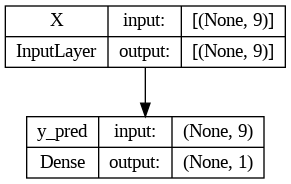

In [ ]:
show_nn(snn)

In [ ]:
snn.summary()

Model: "simple_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 y_pred (Dense)              (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


### Deep Neural Network

In [ ]:
dnn = make_nn('deep')

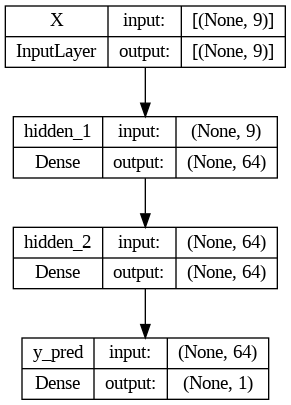

In [ ]:
show_nn(dnn)

In [ ]:
dnn.summary()

Model: "deep_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 64)                640       
                                                                 
 hidden_2 (Dense)            (None, 64)                4160      
                                                                 
 y_pred (Dense)              (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## 4) Generate a solution

### Statistical Model

In [ ]:
y_sm = B @ X.T

results['SM'] = y_sm

### Simple Neural Network
First we need to 'train' the model:

In [ ]:
snn = train_nn(snn)

In [ ]:
y_snn = get_predictions(snn)

results['SNN'] = y_snn

### Deep Neural Network

In [ ]:
dnn = train_nn(dnn)

In [ ]:
y_dnn = get_predictions(dnn)

results['DNN'] = y_dnn

## 5) Evaluate results
To evaluate the results we will select an evaluation metric: Mean Absolute Error:

$$\text{MAE} = \frac{1}{n} \sum^n_{i=1}|y_i - \hat{y_i}|$$

This will tell us the average MPG prediction error. 

**The lower the score, the better the model.**

In [ ]:
for r, y_pred in results.items():
    m = mae(y, y_pred)
    print(f'{r} \t {m} \n')

SM 	 2.51 

SNN 	 2.44 

DNN 	 1.72 

